In [62]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

## Load Images

In [27]:
def load_images(dir):
    total_labels=[]
    images = []
    label = 0
    
    for filename in os.listdir(dir):
        iteration = 1
        if filename == "buildings":
            label = 0
        elif filename == "forest":
            label = 1
        elif filename == "glacier":
            label = 2
        elif filename == "mountain":
            label = 3
        elif filename == "sea":
            label = 4
        elif filename == "street":
            label = 5
        
        for img in os.listdir(dir + "\\" + filename+"\\"):
            print(f"{iteration} | Loading image: ", img)
            img = cv2.imread(dir + "\\" + filename+"\\" + img)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (150, 150))
            images.append(img)
            total_labels.append(label)
            iteration += 1
    return shuffle(images, total_labels, random_state=42)


def get_label(number):
    labels = {0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain' , 4: 'sea', 5: 'street'}
    return labels[number]


In [28]:
images_train, label_train = load_images(
    "PATH_TO_TRAIN_IMAGES")


1 | Loading image:  0.jpg
2 | Loading image:  10006.jpg
3 | Loading image:  1001.jpg
4 | Loading image:  10014.jpg
5 | Loading image:  10018.jpg
6 | Loading image:  10029.jpg
7 | Loading image:  10032.jpg
8 | Loading image:  10056.jpg
9 | Loading image:  1009.jpg
10 | Loading image:  10113.jpg
11 | Loading image:  1012.jpg
12 | Loading image:  10126.jpg
13 | Loading image:  10144.jpg
14 | Loading image:  10151.jpg
15 | Loading image:  10161.jpg
16 | Loading image:  10165.jpg
17 | Loading image:  10176.jpg
18 | Loading image:  10184.jpg
19 | Loading image:  10185.jpg
20 | Loading image:  10191.jpg
21 | Loading image:  10196.jpg
22 | Loading image:  10198.jpg
23 | Loading image:  10205.jpg
24 | Loading image:  10210.jpg
25 | Loading image:  10228.jpg
26 | Loading image:  10231.jpg
27 | Loading image:  10251.jpg
28 | Loading image:  10252.jpg
29 | Loading image:  10257.jpg
30 | Loading image:  10266.jpg
31 | Loading image:  10278.jpg
32 | Loading image:  1028.jpg
33 | Loading image:  1029

In [44]:
images_train_np = np.asarray(images_train, dtype=np.float32) / 255
label_train_np = np.asarray(label_train)

images_train_np.shape, label_train_np.shape

((14034, 150, 150, 3), (14034,))

In [45]:
images_test, label_test = load_images("PATH_TO_TEST_IMAGES")

1 | Loading image:  20057.jpg
2 | Loading image:  20060.jpg
3 | Loading image:  20061.jpg
4 | Loading image:  20064.jpg
5 | Loading image:  20073.jpg
6 | Loading image:  20074.jpg
7 | Loading image:  20078.jpg
8 | Loading image:  20083.jpg
9 | Loading image:  20094.jpg
10 | Loading image:  20096.jpg
11 | Loading image:  20113.jpg
12 | Loading image:  20131.jpg
13 | Loading image:  20140.jpg
14 | Loading image:  20177.jpg
15 | Loading image:  20186.jpg
16 | Loading image:  20206.jpg
17 | Loading image:  20207.jpg
18 | Loading image:  20218.jpg
19 | Loading image:  20228.jpg
20 | Loading image:  20231.jpg
21 | Loading image:  20241.jpg
22 | Loading image:  20245.jpg
23 | Loading image:  20246.jpg
24 | Loading image:  20250.jpg
25 | Loading image:  20268.jpg
26 | Loading image:  20294.jpg
27 | Loading image:  20309.jpg
28 | Loading image:  20344.jpg
29 | Loading image:  20350.jpg
30 | Loading image:  20366.jpg
31 | Loading image:  20374.jpg
32 | Loading image:  20390.jpg
33 | Loading imag

In [47]:
image_test_np = np.asarray(images_test, dtype=np.float32) / 255
label_test_np = np.asarray(label_test)

image_test_np.shape, label_test_np.shape

((3000, 150, 150, 3), (3000,))

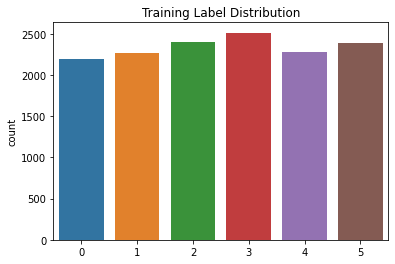

In [51]:
plt.title("Training Label Distribution")
sns.countplot(x=label_train_np)
plt.show()

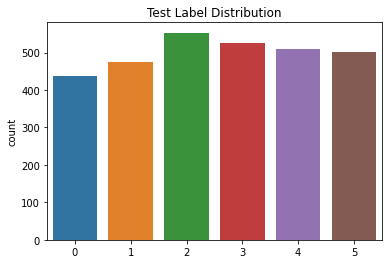

In [52]:
plt.title("Test Label Distribution")
sns.countplot(x=label_test_np)
plt.show()

## Data Augmentation

In [54]:
BATCH_SIZE = 32

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    # rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    height_shift_range=0.2,
    width_shift_range=0.2,
    rotation_range=10,
    fill_mode = 'nearest'
)

# Test generator gausah di augmentasi
test_gen = ImageDataGenerator()

train = train_gen.flow(images_train_np, label_train_np, batch_size=BATCH_SIZE, shuffle=True)
test = test_gen.flow(image_test_np, label_test_np, batch_size=BATCH_SIZE, shuffle=True)

## Modeling

In [57]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 128)      512       
 hNormalization)                                                 
                                                        

In [70]:
model_cnn.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy", metrics=['accuracy'])


In [71]:
# callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='loss', factor=0.3, patience=2, verbose=1, min_lr=0.000001)

callbacks = [es, lr_reduction]

Epoch 1/100
439/439 [==============================] - 61s 111ms/step - loss: 1.3424 - accuracy: 0.4801 - val_loss: 1.0069 - val_accuracy: 0.6233 - lr: 0.0010
Epoch 2/100
439/439 [==============================] - 46s 104ms/step - loss: 0.9994 - accuracy: 0.6161 - val_loss: 2.7012 - val_accuracy: 0.3237 - lr: 0.0010
Epoch 3/100
439/439 [==============================] - 46s 104ms/step - loss: 0.8744 - accuracy: 0.6803 - val_loss: 0.7102 - val_accuracy: 0.7343 - lr: 0.0010
Epoch 4/100
439/439 [==============================] - 45s 102ms/step - loss: 0.7706 - accuracy: 0.7261 - val_loss: 0.9447 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 5/100
439/439 [==============================] - 45s 103ms/step - loss: 0.7049 - accuracy: 0.7532 - val_loss: 0.9035 - val_accuracy: 0.6743 - lr: 0.0010
Epoch 6/100
439/439 [==============================] - 45s 102ms/step - loss: 0.6704 - accuracy: 0.7707 - val_loss: 0.9301 - val_accuracy: 0.6767 - lr: 0.0010
Epoch 7/100
439/439 [=========================

<AxesSubplot:>

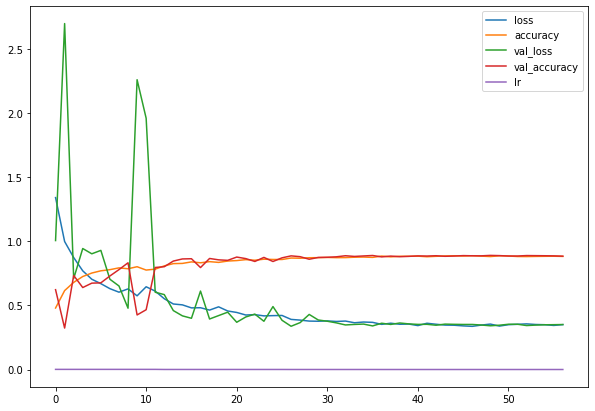

In [72]:
history = model_cnn.fit(train, epochs=100, validation_data=test, callbacks=callbacks)
pd.DataFrame(history.history).plot(figsize=(10, 7))

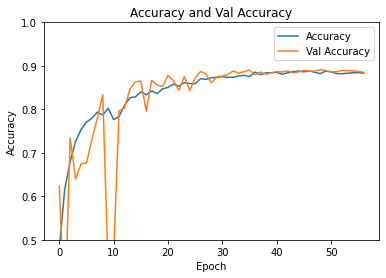

In [82]:
plt.title("Accuracy and Val Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.5, 1])
sns.lineplot(x=range(57), y="accuracy", data=pd.DataFrame(history.history), label="Accuracy")
sns.lineplot(x=range(57), y="val_accuracy", data=pd.DataFrame(history.history), label="Val Accuracy")
plt.show()

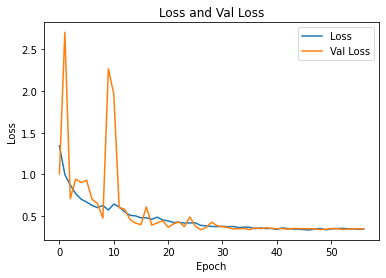

In [87]:
# Plotting the loss
plt.title("Loss and Val Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
sns.lineplot(x=range(57), y="loss", data=pd.DataFrame(history.history), label="Loss")
sns.lineplot(x=range(57), y="val_loss", data=pd.DataFrame(history.history), label="Val Loss")
plt.show()

In [92]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

predict_proba1 = model_cnn.predict(image_test_np)
y_pred1 = np.argmax(predict_proba1, axis=1)
y_test = label_test_np
print('f1 Score : ',f1_score(y_test, y_pred1, average="macro"))
print('recall  :',   recall_score(y_test,y_pred1,average="macro"))
print('precision ',precision_score(y_test,y_pred1,average="macro"))

f1 Score :  0.8886863842566388
recall  : 0.8906097491143417
precision  0.8891907637538496


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       437
           1       0.97      0.97      0.97       474
           2       0.86      0.86      0.86       553
           3       0.89      0.78      0.83       525
           4       0.89      0.93      0.91       510
           5       0.91      0.88      0.90       501

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



## Prediction

In [135]:
def pred_img(dir):
    count = 0
    for i, files in enumerate(os.listdir(dir)):
        img = cv2.imread(dir +"\\"+ files)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, cmap=plt.cm.binary)
        img = cv2.resize(img, (150, 150))
        img = np.expand_dims(img, axis=0)
        # img = img / 255
        pred_proba = model_cnn.predict(img)
        pred_class = np.argmax(pred_proba)
        plt.subplot(6, 10, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(get_label(int(pred_class)))
        count+=1
        if(count==60):
            break

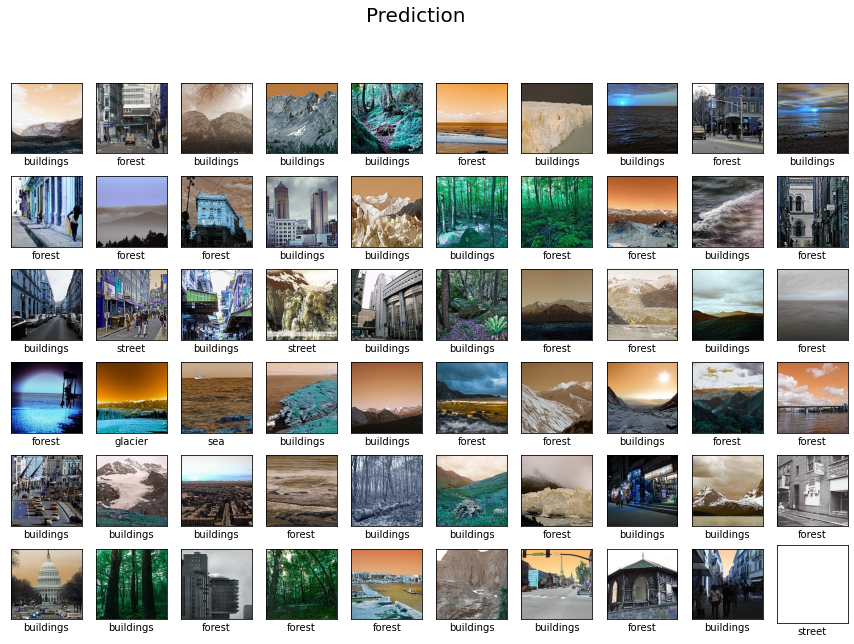

In [138]:
plt.figure(figsize=(15,10))
plt.suptitle("Prediction", fontsize=20)
pred_img("PATH_TO_PRED_IMAGES")
plt.savefig("pred.png")
plt.show()